In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns


import multiprocessing

from tqdm import tqdm_notebook

import model_testing

from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

dataset_loc = "./Churn_Modelling.csv"

In [2]:
df = pd.read_csv(dataset_loc, index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Changing range of tenure from 1 to 10
df['Tenure'] = df['Tenure'] + 1

# Changing all values of balance from 0 to 1
df['Balance'] = df['Balance'].replace(0,1)

# Change range of HasCrCard from 0,1 to 1,2
df['HasCrCard'] = df['HasCrCard'] + 1

# Change range of IsActive Member from 0,1 to 1,2
df['IsActiveMember'] = df['IsActiveMember'] + 1

In [4]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,6.012800,76486.250988,1.530200,1.70550,1.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62396.961791,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,1.000000,1.000000,1.000000,1.00000,1.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,4.000000,1.000000,1.000000,1.00000,1.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,6.000000,97198.540000,1.000000,2.00000,2.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,8.000000,127644.240000,2.000000,2.00000,2.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,11.000000,250898.090000,4.000000,2.00000,2.000000,199992.480000,1.000000


<Axes: >

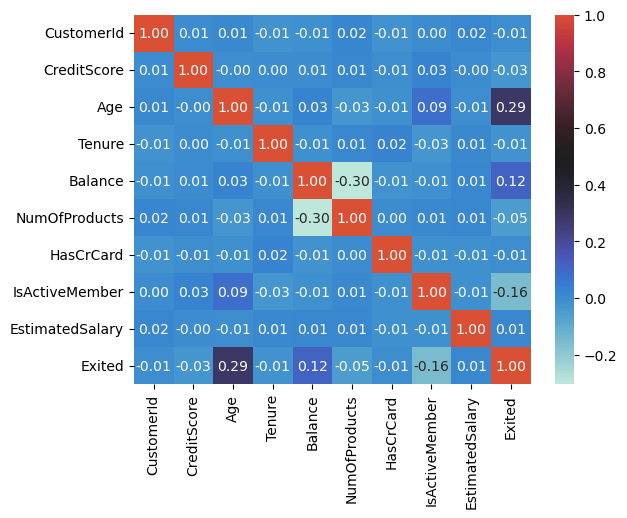

In [31]:
sns.heatmap(df[df.describe().columns].corr(),
            annot=True,
            fmt='.2f',
            center=0.5)

<Axes: >

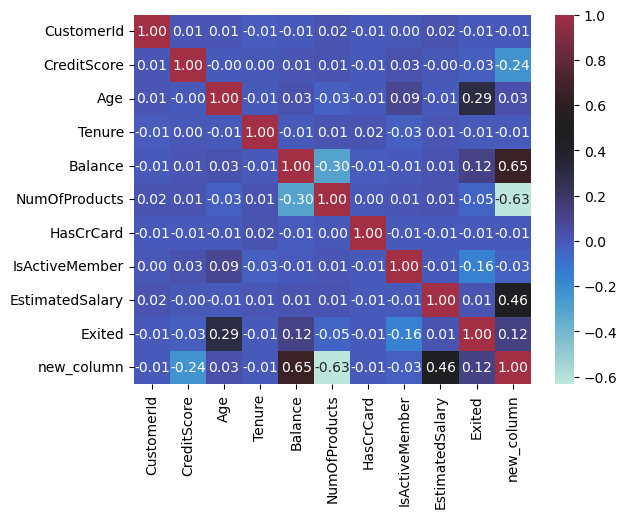

In [32]:
df['new_column'] = ((df.Balance + df.EstimatedSalary)/df.CreditScore) * (1/df.NumOfProducts)
sns.heatmap(df[df.describe().columns].corr(),
            annot=True,
            fmt='.2f',
            center=0.5)

<Axes: >

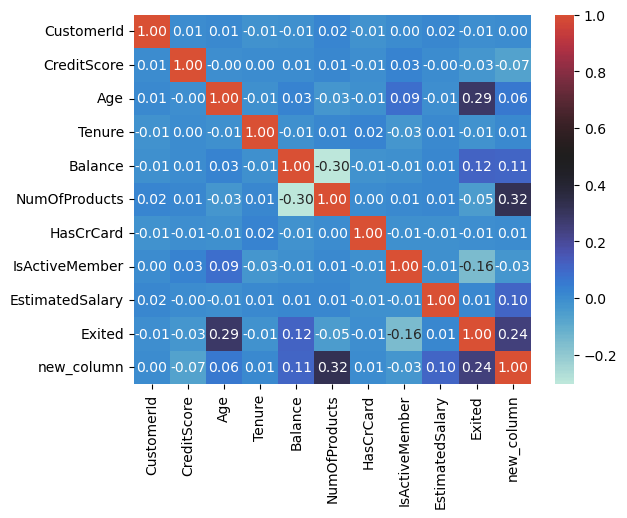

In [33]:
df['new_column'] = ((df.Balance + df.EstimatedSalary)/df.CreditScore) * (1/df.NumOfProducts)
df['new_column'] = np.where(df.NumOfProducts.isin([3,4]), df['new_column']**2, df['new_column'])
sns.heatmap(df[df.describe().columns].corr(),
            annot=True,
            fmt='.2f',
            center=0.5)

In [5]:
columns_name = ['CreditScore', 'Age', 'Tenure', 'Balance',
                'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
                'EstimatedSalary']

corr_data_col_name = ['c1', 'c2', 'c3', 'c4', 'c5', 'corr']

In [3]:
# # df = pd.read_csv(dataset_loc, index_col=0)
# corr_data__values = []
# all_metrics_data = []

# for col_1 in tqdm_gui(columns_name):
#     for col_2 in tqdm_notebook(columns_name):
#         for col_3 in columns_name:
#             for col_4 in columns_name:
#                 for col_5 in columns_name:
                    
#                     df = pd.read_csv(dataset_loc, index_col=0)
                
#                     df['new_column'] = ((df[col_1] + df[col_2])/df[col_3]) * (1/df[col_4])
                    
#                     if col_5 == 'NumOfProducts':
#                         df['new_column'] = np.where(df[col_5].isin([3,4]), df['new_column']**2, df['new_column'])
#                         corr_value = df[df.describe().columns].corr().values[-1][9]
                        
#                     elif col_5 == 'CreditScore':
#                         df['new_column'] = np.where(df[col_5].isin(range(580,641)), df['new_column']**2, df['new_column'])
#                         corr_value = df[df.describe().columns].corr().values[-1][9]
                        
#                     elif col_5 == 'Age':
#                         df['new_column'] = np.where(df[col_5].isin(range(34,45)), df['new_column']**2, df['new_column'])
#                         corr_value = df[df.describe().columns].corr().values[-1][9]
                        
#                     elif col_5 == 'Tenure':
#                         df['new_column'] = np.where(df[col_5].isin([1,2,3,4,5,9]), df['new_column']**2, df['new_column'])
#                         corr_value = df[df.describe().columns].corr().values[-1][9]
                        
#                     elif col_5 == 'Balance':
#                         df['new_column'] = np.where(df[col_5].isin(range(104000,128000)), df['new_column']**2, df['new_column'])
#                         corr_value = df[df.describe().columns].corr().values[-1][9]
                        
#                     elif col_5 == 'HasCrCard':
#                         df['new_column'] = np.where(df[col_5].isin([1]), df['new_column']**2, df['new_column'])
#                         corr_value = df[df.describe().columns].corr().values[-1][9]
                        
#                     elif col_5 == 'IsActiveMember':
#                         df['new_column'] = np.where(df[col_5].isin([0]), df['new_column']**2, df['new_column'])
#                         corr_value = df[df.describe().columns].corr().values[-1][9]
                        
#                     elif col_5 == 'EstimatedSalary':
#                         df['new_column'] = np.where(df[col_5].isin(range(96000,106000)), df['new_column']**2, df['new_column'])
#                         corr_value = df[df.describe().columns].corr().values[-1][9]
                    
                    
#                     corr_data__values.append([col_1,col_2, col_3, col_4, col_5, corr_value])
#                     del corr_value
                    
# #                     sns.heatmap(df[df.describe().columns].corr(),
# #                             annot=True,
# #                             fmt='.2f',
# #                             center=0.5)

In [4]:
# qw = pd.DataFrame(corr_data__values,columns=corr_data_col_name)
# qw

In [23]:
# pd.DataFrame(corr_data__values,columns=corr_data_col_name).to_csv("./final_results/corr_values.csv", header=True, index=False)

In [5]:
# col_1 = 'Age'
# col_2 = 'Age'
# col_3 = 'NumOfProducts'
# col_4 = 'NumOfProducts'
# col_5 = 'NumOfProducts'

# df = pd.read_csv(dataset_loc, index_col=0)
# df['new_column'] = ((df[col_1] + df[col_2])/df[col_3]) * (1/df[col_4])
# df['new_column'] = np.where(df[col_5].isin([3,4]), df['new_column']**2, df['new_column'])

# sns.heatmap(df[df.describe().columns].corr(),
#             annot=True,
#             fmt='.2f',
#             center=0.5)

In [6]:
def training(col_5):
    df = pd.read_csv("./Churn_Modelling.csv", index_col=0)
                
    df['new_column'] = ((df[col_1] + df[col_2])/df[col_3]) * (1/df[col_4])

    if col_5 == 'NumOfProducts':
        df['new_column'] = np.where(df[col_5].isin([3,4]), df['new_column']**2, df['new_column'])
        corr_value = df[df.describe().columns].corr().values[-1][9]

    elif col_5 == 'CreditScore':
        df['new_column'] = np.where(df[col_5].isin(range(580,641)), df['new_column']**2, df['new_column'])
        corr_value = df[df.describe().columns].corr().values[-1][9]

    elif col_5 == 'Age':
        df['new_column'] = np.where(df[col_5].isin(range(34,45)), df['new_column']**2, df['new_column'])
        corr_value = df[df.describe().columns].corr().values[-1][9]

    elif col_5 == 'Tenure':
        df['new_column'] = np.where(df[col_5].isin([2,3,4,5,6,10]), df['new_column']**2, df['new_column'])
        corr_value = df[df.describe().columns].corr().values[-1][9]

    elif col_5 == 'Balance':
        df['new_column'] = np.where(df[col_5].isin(range(104000,128000)), df['new_column']**2, df['new_column'])
        corr_value = df[df.describe().columns].corr().values[-1][9]

    elif col_5 == 'HasCrCard':
        df['new_column'] = np.where(df[col_5].isin([2]), df['new_column']**2, df['new_column'])
        corr_value = df[df.describe().columns].corr().values[-1][9]

    elif col_5 == 'IsActiveMember':
        df['new_column'] = np.where(df[col_5].isin([1]), df['new_column']**2, df['new_column'])
        corr_value = df[df.describe().columns].corr().values[-1][9]

    elif col_5 == 'EstimatedSalary':
        df['new_column'] = np.where(df[col_5].isin(range(96000,106000)), df['new_column']**2, df['new_column'])
        corr_value = df[df.describe().columns].corr().values[-1][9]
    
#     print(corr_value)

    if not np.isnan(corr_value):
        
        if corr_value > 0.2 or corr_value < -0.2:

            # Converting type of columns to category
            df['Geography'] = df['Geography'].astype('category')
            df['Gender'] = df['Gender'].astype('category')
            df['Surname'] = df['Surname'].astype('category')

            # Assigning numerical values and storing it in another columns
            df['Geography_new'] = df['Geography'].cat.codes
            df['Gender_new'] = df['Gender'].cat.codes
            df['Surname_new'] = df['Surname'].cat.codes

            df['Geography'] = df['Geography_new']
            df['Gender'] = df['Gender_new']
            df['Surname'] = df['Surname_new']

            df.drop(['CustomerId','Surname_new','Geography_new', 'Gender_new'], axis = 1,inplace=True)

            # Split the DataFrame into features and target variables.
            x,y = model_testing.features_target_split(df)

            # Split the features and target variables into training and testing sets.
            x_train, x_test, y_train, y_test = model_testing.train_test_split(x,y,df)

            catboost_model = CatBoostClassifier(random_state=42,cat_features=[0,2,3,7,8,9])
            catboost_model.fit(x_train, y_train, verbose=False)

            # Generate predictions
            y_pred_train, y_pred_test, y_pred_test_proba = model_testing.prediction(catboost_model, x_train, x_test)

            # Calculate evaluation metrics
            model_evaluation = model_testing.Evaluation(y_train, y_test, y_pred_train, y_pred_test, y_pred_test_proba)

            all_metrics,_ = model_evaluation.main()
            
            all_metrics = all_metrics + [col_1, col_2, col_3, col_4, col_5, corr_value]

    #         corr_data_values.append([col_1,col_2, col_3, col_4, col_5, corr_value])
#             all_metrics_data.append(all_metrics)

            return all_metrics

In [7]:
columns_name = ['CreditScore', 'Age', 'Tenure', 'Balance',
                'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
                'EstimatedSalary']

actual_metrics_data_columns = ['train_accuracy', 'test_accuracy', 'roc_auc',
                         'precision_0', 'recall_0', 'f1_0',
                         'precision_1', 'recall_1', 'f1_1', 
                         'ks_stat', 'p_value', 
                         'tp', 'tn', 'fp', 'fn','c1', 'c2', 'c3', 'c4', 'c5', 'corr']



# corr_data_col_name = ['c1', 'c2', 'c3', 'c4', 'c5', 'corr']

In [4]:
# # df = pd.read_csv(dataset_loc, index_col=0)
# corr_data_values = []
# all_metrics_data = []

# for col_1 in tqdm_notebook(columns_name):
#     for col_2 in tqdm_notebook(columns_name):
#         for col_3 in columns_name:
#             for col_4 in columns_name:
#                 for col_5 in columns_name:
                    
#                     training()
# #                     break
# #                 break
# #             break
# #         break
# #     break

In [8]:
# df = pd.read_csv(dataset_loc, index_col=0)
corr_data_values = []
all_metrics_data = []

for col_1 in tqdm_notebook(columns_name):
    for col_2 in tqdm_notebook(columns_name):
        for col_3 in columns_name:
            for col_4 in columns_name:
                
                # Create a multiprocessing pool
                pool = multiprocessing.Pool()
                # Iterate over model_list and methods_ to process each combination in parallel
                all_metrics = pool.map(training, columns_name)

                # Close the pool and wait for all processes to complete
                pool.close()
                pool.join()
                
                all_metrics_data = all_metrics_data + all_metrics

#                 break
#             break
#         break
#     break

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [11]:
qq = pd.DataFrame([entry for entry in all_metrics_data if entry!=None],columns=actual_metrics_data_columns)
qq

,train_accuracy,test_accuracy,roc_auc,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1,ks_stat,...,tp,tn,fp,fn,c1,c2,c3,c4,c5,corr
0,0.883375,0.8725,0.734293,0.883601,0.967357,0.923584,0.796875,0.501229,0.615385,0.592611,...,204,1541,52,203,CreditScore,CreditScore,CreditScore,CreditScore,NumOfProducts,-0.203057
1,0.883750,0.8680,0.725980,0.880366,0.965474,0.920958,0.782609,0.486486,0.600000,0.584342,...,198,1538,55,209,CreditScore,CreditScore,CreditScore,Age,Balance,-0.283280
2,0.882000,0.8690,0.729352,0.881813,0.964846,0.921463,0.782101,0.493857,0.605422,0.581757,...,201,1537,56,206,CreditScore,CreditScore,CreditScore,Age,NumOfProducts,-0.378851
3,0.882500,0.8765,0.742292,0.886782,0.968613,0.925893,0.807692,0.515971,0.629685,0.585996,...,210,1543,50,197,CreditScore,CreditScore,CreditScore,Age,HasCrCard,-0.283231
4,0.882125,0.8720,0.735808,0.884416,0.965474,0.923169,0.789272,0.506143,0.616766,0.600252,...,206,1538,55,201,CreditScore,CreditScore,CreditScore,Age,EstimatedSalary,-0.282576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,0.882000,0.8690,0.729352,0.881813,0.964846,0.921463,0.782101,0.493857,0.605422,0.581757,...,201,1537,56,206,EstimatedSalary,EstimatedSalary,EstimatedSalary,Age,NumOfProducts,-0.378851
1903,0.882500,0.8765,0.742292,0.886782,0.968613,0.925893,0.807692,0.515971,0.629685,0.585996,...,210,1543,50,197,EstimatedSalary,EstimatedSalary,EstimatedSalary,Age,HasCrCard,-0.283231
1904,0.882125,0.8720,0.735808,0.884416,0.965474,0.923169,0.789272,0.506143,0.616766,0.600252,...,206,1538,55,201,EstimatedSalary,EstimatedSalary,EstimatedSalary,Age,EstimatedSalary,-0.282576
1905,0.884000,0.8710,0.732437,0.882960,0.966102,0.922662,0.789883,0.498771,0.611446,0.587015,...,203,1539,54,204,EstimatedSalary,EstimatedSalary,EstimatedSalary,HasCrCard,NumOfProducts,0.298399


In [12]:
qq.sort_values(by=['corr'], ascending=True)

,train_accuracy,test_accuracy,roc_auc,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1,ks_stat,...,tp,tn,fp,fn,c1,c2,c3,c4,c5,corr
1396,0.886625,0.8730,0.733692,0.883228,0.968613,0.923952,0.802372,0.498771,0.615152,0.585402,...,203,1543,50,204,HasCrCard,NumOfProducts,Age,HasCrCard,NumOfProducts,-0.414938
1404,0.886625,0.8730,0.733692,0.883228,0.968613,0.923952,0.802372,0.498771,0.615152,0.585402,...,203,1543,50,204,HasCrCard,NumOfProducts,HasCrCard,Age,NumOfProducts,-0.414938
1170,0.886625,0.8730,0.733692,0.883228,0.968613,0.923952,0.802372,0.498771,0.615152,0.585402,...,203,1543,50,204,NumOfProducts,HasCrCard,Age,HasCrCard,NumOfProducts,-0.414938
1178,0.886625,0.8730,0.733692,0.883228,0.968613,0.923952,0.802372,0.498771,0.615152,0.585402,...,203,1543,50,204,NumOfProducts,HasCrCard,HasCrCard,Age,NumOfProducts,-0.414938
1638,0.886500,0.8745,0.735548,0.883867,0.969868,0.924873,0.809524,0.501229,0.619120,0.579017,...,204,1545,48,203,IsActiveMember,NumOfProducts,HasCrCard,Age,NumOfProducts,-0.413337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.881375,0.8750,0.740435,0.886141,0.967357,0.924970,0.800766,0.513514,0.625749,0.592827,...,209,1541,52,198,Age,HasCrCard,NumOfProducts,HasCrCard,NumOfProducts,0.367099
1320,0.881375,0.8750,0.740435,0.886141,0.967357,0.924970,0.800766,0.513514,0.625749,0.592827,...,209,1541,52,198,HasCrCard,Age,NumOfProducts,HasCrCard,NumOfProducts,0.367099
1333,0.881375,0.8750,0.740435,0.886141,0.967357,0.924970,0.800766,0.513514,0.625749,0.592827,...,209,1541,52,198,HasCrCard,Age,HasCrCard,NumOfProducts,NumOfProducts,0.367099
500,0.881375,0.8750,0.740435,0.886141,0.967357,0.924970,0.800766,0.513514,0.625749,0.592827,...,209,1541,52,198,Age,HasCrCard,HasCrCard,NumOfProducts,NumOfProducts,0.367099


In [9]:
# pd.DataFrame([entry for entry in all_metrics_data if entry!=None],columns=actual_metrics_data_columns).to_csv("./final_results/catboost_with_corr_values_1.csv", header=True, index=False)



In [33]:
df = pd.read_csv(dataset_loc, index_col=0)
# df.head()

# Changing range of tenure from 1 to 10
df['Tenure'] = df['Tenure'] + 1

# Changing all values of balance from 0 to 1
df['Balance'] = df['Balance'].replace(0,1)

# Change range of HasCrCard from 0,1 to 1,2
df['HasCrCard'] = df['HasCrCard'] + 1

# Change range of IsActive Member from 0,1 to 1,2
df['IsActiveMember'] = df['IsActiveMember'] + 1

<Axes: >

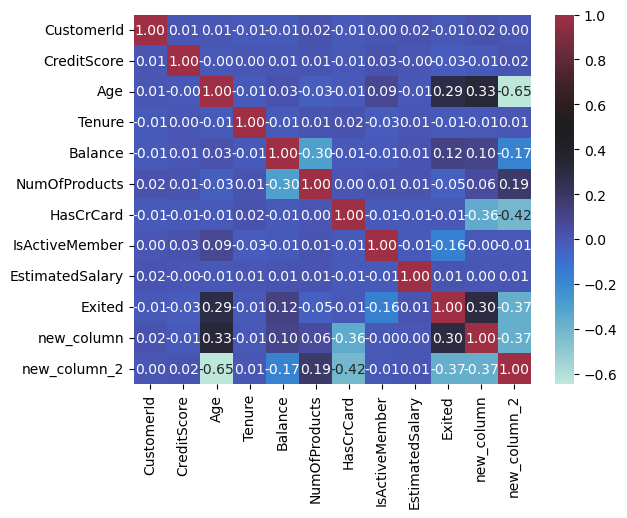

In [34]:
col_1 = 'Age'
col_2 = 'HasCrCard'
col_3 = 'HasCrCard'
col_4 = 'NumOfProducts'
col_5 = 'NumOfProducts'

# df = pd.read_csv(dataset_loc, index_col=0)
df['new_column'] = ((df[col_1] + df[col_2])/df[col_3]) * (1/df[col_4])
df['new_column'] = np.where(df[col_5].isin([3,4]), df['new_column']**2, df['new_column'])

col_1 = 'NumOfProducts'
col_2 = 'HasCrCard'
col_3 = 'Age'
col_4 = 'HasCrCard'
col_5 = 'NumOfProducts'

# df = pd.read_csv(dataset_loc, index_col=0)
df['new_column_2'] = ((df[col_1] + df[col_2])/df[col_3]) * (1/df[col_4])
df['new_column_2'] = np.where(df[col_5].isin([3,4]), df['new_column_2']**2, df['new_column_2'])

sns.heatmap(df[df.describe().columns].corr(),
            annot=True,
            fmt='.2f',
            center=0.5)

In [35]:
# Converting type of columns to category
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Surname'] = df['Surname'].astype('category')

# Assigning numerical values and storing it in another columns
df['Geography_new'] = df['Geography'].cat.codes
df['Gender_new'] = df['Gender'].cat.codes
df['Surname_new'] = df['Surname'].cat.codes

df['Geography'] = df['Geography_new']
df['Gender'] = df['Gender_new']
df['Surname'] = df['Surname_new']

df.drop(['CustomerId','Surname_new','Geography_new', 'Gender_new'], axis = 1,inplace=True)

In [36]:
# Split the DataFrame into features and target variables.
x,y = model_testing.features_target_split(df)

# Split the features and target variables into training and testing sets.
x_train, x_test, y_train, y_test = model_testing.train_test_split(x,y,df)

x_train.head()

catboost_model = CatBoostClassifier(random_state=42,cat_features=[0,2,3,7,8,9])
catboost_model.fit(x_train, y_train, verbose=False)

In [45]:
# Generate predictions
catboost_model.set_probability_threshold(0.336)


y_pred_train, y_pred_test, y_pred_test_proba = model_testing.prediction(catboost_model, x_train, x_test)

# Calculate evaluation metrics
model_evaluation = model_testing.Evaluation(y_train, y_test, y_pred_train, y_pred_test, y_pred_test_proba)

all_metrics,uhuh = model_evaluation.main()
uhuh

{'train_acc': 0.880375,
 'test_acc': 0.853,
 'roc_auc': 0.773271,
 'class_0': {'precision': 0.907721, 'recall': 0.907721, 'f1': 0.907721},
 'class_1': {'precision': 0.638821, 'recall': 0.638821, 'f1': 0.638821},
 'ks_stats': 0.582587,
 'p_value': 0.0,
 'tp': 260,
 'tn': 1446,
 'fp': 147,
 'fn': 147}